<a href="https://colab.research.google.com/github/trevinofernando/MNIST-withPytorch/blob/main/PA_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ConvNet.py

In [ ]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self, mode):
        super(ConvNet, self).__init__()
        
        # Define various layers here for forward to choose from and use later.
        
        self.maxPool1 = nn.MaxPool2d(2, 2)
        self.dropoutHalf = nn.Dropout(0.5)

        self.model_1_in = nn.Linear(28 * 28 * 1, 100)
        self.model_1_fc1 = nn.Linear(100, 10)
        
        self.model_2_conv1 = nn.Conv2d(1,10,5)
        self.model_2_conv2 = nn.Conv2d(10,40,5)
        self.model_2_in = nn.Linear(40 * 4 * 4, 100)
        self.model_4_fc1 = nn.Linear(100, 100)
        # model_1_fc1 here

        self.model_5_in = nn.Linear(40 * 4 * 4, 1000)
        self.model_5_fc1 = nn.Linear(1000, 1000)
        self.model_5_fc2 = nn.Linear(1000, 10)
        
        # This will select the forward pass function based on mode for the ConvNet.
        # Based on the question, you have 5 modes available for step 1 to 5.
        # During creation of each ConvNet model, you will assign one of the valid mode.
        # This will fix the forward function (and the network graph) for the entire training/testing
        if mode == 1:
            self.forward = self.model_1
        elif mode == 2:
            self.forward = self.model_2
        elif mode == 3:
            self.forward = self.model_3
        elif mode == 4:
            self.forward = self.model_4
        elif mode == 5:
            self.forward = self.model_5
        else: 
            print("Invalid mode ", mode, "selected. Select between 1-5")
            exit(0)
        
        
    # Baseline model. step 1
    def model_1(self, x):
        # ======================================================================
        # One fully connected layer. 
        # ----------------------------------------------------------------------
        # Create a fully connected (FC) hidden layer (with 100 neurons) with 
        # sigmoid activation function. Train it with SGD with a 
        # learning rate of 0.1 (a total of 60 epoch), a mini-batch size of 10, 
        # and no regularization.
        # ======================================================================
        #x = x.view(-1, self.num_flat_features(x))
        x = torch.flatten(x, 1)
        x = self.model_1_in(x)
        x = torch.sigmoid(x)
        x = self.model_1_fc1(x)
        x = torch.sigmoid(x)
        
        out = F.softmax(x, dim=1)
        return out

    # Use two convolutional layers.
    def model_2(self, x):
        # ======================================================================
        # Two convolutional layers + one fully connected layer.
        # ----------------------------------------------------------------------
        # Now insert two convolutional layers to the network built in 
        # STEP 1 (and put pooling layer too foreach convolutional layer). 
        # Pool over 2x2 regions, 40 kernels, stride =1, with kernel size of 5x5.
        # ======================================================================
        # => 1x28x28
        x = self.model_2_conv1(x) #=> 10x24x24
        x = torch.sigmoid(x)
        x = self.maxPool1(x)  #=> 10x12x12
        x = self.model_2_conv2(x) #=> 40x8x8
        x = torch.sigmoid(x)
        x = self.maxPool1(x) #=> 40x4x4

        x = torch.flatten(x, 1)

        x = self.model_2_in(x)
        x = torch.sigmoid(x)
        x = self.model_1_fc1(x)
        x = torch.sigmoid(x)

        out = F.softmax(x, dim=1)
        
        return out

    # Replace sigmoid with ReLU.
    def model_3(self, x):
        # ======================================================================
        # Two convolutional layers + one fully connected layer, with ReLU.
        # ----------------------------------------------------------------------
        # For the network depicted in STEP 2, replace Sigmoid with ReLU, and 
        # train the model with new learning rate (=0.03). Re-train the system with 
        # this setting.
        # ======================================================================
        x = self.model_2_conv1(x)
        x = F.relu(x)
        x = self.maxPool1(x)
        x = self.model_2_conv2(x)
        x = F.relu(x)
        x = self.maxPool1(x)

        x = torch.flatten(x, 1)
        
        x = self.model_2_in(x)
        x = F.relu(x)
        x = self.model_1_fc1(x)
        x = F.relu(x)

        out = F.softmax(x, dim=1)
        return out

    # Add one extra fully connected layer.
    def model_4(self, x):
        # ======================================================================
        # Two convolutional layers + two fully connected layers, with ReLU.
        # ----------------------------------------------------------------------
        # Add another fully connected (FC) layer now (with 100 neurons) to the 
        # network built in STEP 3.(remember that the first FC was put in STEP 1, 
        # here you are putting just another FC).
        # ======================================================================
        
        x = self.model_2_conv1(x)
        x = F.relu(x)
        x = self.maxPool1(x)
        x = self.model_2_conv2(x)
        x = F.relu(x)
        x = self.maxPool1(x)

        x = torch.flatten(x, 1)
        
        x = self.model_2_in(x)
        x = F.relu(x)
        x = self.model_4_fc1(x)
        x = F.relu(x)
        x = self.model_1_fc1(x)
        x = F.relu(x)

        out = F.softmax(x, dim=1)
        return out

    # Use Dropout now.
    def model_5(self, x):
        # ======================================================================
        # Two convolutional layers + two fully connected layers, with ReLU.
        # and  + Dropout.
        # ----------------------------------------------------------------------
        # Change the neurons numbers in FC layers into 1000. For regularization, 
        # use Dropout (with a rate of 0.5). Train the whole system using 40 epochs.
        # ======================================================================
        
        x = self.model_2_conv1(x)
        x = F.relu(x)
        x = self.maxPool1(x)
        x = self.model_2_conv2(x)
        x = F.relu(x)
        x = self.maxPool1(x)

        x = torch.flatten(x, 1)
        
        x = self.model_5_in(x)
        x = F.relu(x)
        x = self.dropoutHalf(x)
        x = self.model_5_fc1(x)
        x = F.relu(x)
        x = self.dropoutHalf(x)
        x = self.model_5_fc2(x)
        x = F.relu(x)

        out = F.softmax(x, dim=1)
        return out
    
    def num_flat_features(self, x):
        size = x.size()[1:] #all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


# train_evaluate_CNN.py

In [ ]:
from __future__ import print_function
import argparse
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.tensorboard import SummaryWriter
#from ConvNet import ConvNet 
import argparse
import numpy as np 
import matplotlib.pyplot as plt

def train(model, device, train_loader, optimizer, criterion, epoch, batch_size):
    '''
    Trains the model for an epoch and optimizes it.
    model: The model to train. Should already be in correct device.
    device: 'cuda' or 'cpu'.
    train_loader: dataloader for training samples.
    optimizer: optimizer to use for model parameter updates.
    criterion: used to compute loss for prediction and target 
    epoch: Current epoch to train for.
    batch_size: Batch size to be used.
    '''
    
    # Set model to train mode before each epoch
    model.train()
    
    # Empty list to store losses 
    losses = []
    correct = 0
    
    # Iterate over entire training samples (1 epoch)
    for batch_idx, batch_sample in enumerate(train_loader):
        data, target = batch_sample
        
        # Push data/label to correct device
        data, target = data.to(device), target.to(device)
        
        # Reset optimizer gradients. Avoids grad accumulation (accumulation used in RNN).
        optimizer.zero_grad()
        
        # Do forward pass for current set of data
        output = model(data)
        
        # ======================================================================
        # Compute loss based on criterion
        loss = criterion(output, target)
        
        # Computes gradient based on final loss
        loss.backward()
        
        # Store loss
        losses.append(loss.item())
        
        # Optimize model parameters based on learning rate and gradient 
        optimizer.step()
        
        # Get predicted index by selecting maximum log-probability
        pred = output.argmax(dim=1, keepdim=True)

        # ======================================================================
        # Count correct predictions overall 
        # ----------------- YOUR CODE HERE ----------------------
        #
        # Remove NotImplementedError and assign counting function for correct predictions.
        correct += pred.eq(target.view_as(pred)).sum().item() 
        
    train_loss = float(np.mean(losses))
    train_acc = correct / ((batch_idx+1) * batch_size)
    print('Train set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        float(np.mean(losses)), correct, (batch_idx+1) * batch_size,
        100. * correct / ((batch_idx+1) * batch_size)))
    return train_loss, train_acc
    


def test(model, device, test_loader, criterion):
    '''
    Tests the model.
    model: The model to train. Should already be in correct device.
    device: 'cuda' or 'cpu'.
    test_loader: dataloader for test samples.
    '''
    
    # Set model to eval mode to notify all layers.
    model.eval()
    
    losses = []
    correct = 0
    
    # Set torch.no_grad() to disable gradient computation and backpropagation
    with torch.no_grad():
        for batch_idx, sample in enumerate(test_loader):
            data, target = sample
            data, target = data.to(device), target.to(device)
            

            # Predict for data by doing forward pass
            output = model(data)
            
            # ======================================================================
            # Compute loss based on same criterion as training
            loss = criterion(output, target)
            
            # Append loss to overall test loss
            losses.append(loss.item())
            
            # Get predicted index by selecting maximum log-probability
            pred = output.argmax(dim=1, keepdim=True)
            
            # ======================================================================
            # Count correct predictions overall 
            correct += pred.eq(target.view_as(pred)).sum().item() 

    test_loss = float(np.mean(losses))
    accuracy = 100. * correct / len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), accuracy))
    
    return test_loss, accuracy
    

def run_main(FLAGS):
    # Check if cuda is available
    use_cuda = torch.cuda.is_available()
    
    # Set proper device based on cuda availability 
    device = torch.device("cuda" if use_cuda else "cpu")
    print("Torch device selected: ", device)
    
    # Initialize the model and send to device 
    print("Using model #", FLAGS.mode)
    model = ConvNet(FLAGS.mode).to(device)
    
    # ======================================================================
    # Define loss function.
    criterion = nn.CrossEntropyLoss()
    
    # ======================================================================
    # Define optimizer function with learning rate and other paramters.
    optimizer = optim.SGD(model.parameters(), lr=FLAGS.learning_rate)
        
    
    # Create transformations to apply to each data sample 
    # Can specify variations such as image flip, color flip, random crop, ...
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    
    # Load datasets for training and testing
    # Inbuilt datasets available in torchvision (check documentation online)
    dataset1 = datasets.MNIST('./data/', train=True, download=True, transform=transform)
    dataset2 = datasets.MNIST('./data/', train=False, transform=transform)
    train_loader = DataLoader(dataset1, batch_size = FLAGS.batch_size, shuffle=True, num_workers=4)
    test_loader =  DataLoader(dataset2, batch_size = FLAGS.batch_size, shuffle=False, num_workers=4)
    
    best_accuracy = 0.0
    train_loss_list = []
    test_loss_list = []
    train_accuracy_list = []
    test_accuracy_list = []
    
    # Run training for n_epochs specified in config 
    for epoch in range(1, FLAGS.num_epochs + 1):
        print("Current epoch: ", epoch)
        train_loss, train_accuracy = train(model, device, train_loader, optimizer, criterion, epoch, FLAGS.batch_size)
        test_loss, test_accuracy = test(model, device, test_loader, criterion)
        
        train_loss_list.    append(train_loss)
        test_loss_list.     append(test_loss)
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list. append(test_accuracy)

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
    
    epoch_list = range(0,epoch)
    plt.plot(epoch_list, train_loss_list)
    plt.xlabel("No. of epochs")
    plt.ylabel("Loss")
    plt.title("Epochs vs Train Loss")
    plt.show()

    plt.plot(epoch_list, test_loss_list)
    plt.xlabel("No. of epochs")
    plt.ylabel("Loss")
    plt.title("Epochs vs Test Loss")
    plt.show()

    plt.plot(epoch_list, train_accuracy_list)
    plt.xlabel("No. of epochs")
    plt.ylabel("Accuracy")
    plt.title("Epochs vs Train Accuracy")
    plt.show()

    plt.plot(epoch_list, test_accuracy_list)
    plt.xlabel("No. of epochs")
    plt.ylabel("Accuracy")
    plt.title("Epochs vs Test Accuracy")
    plt.show()
    
    print("accuracy is {:2.2f}".format(best_accuracy))
    
    print("Training and evaluation finished")
    
    if(FLAGS.log_dir):
      torch.save(model.state_dict(), FLAGS.log_dir)
    
if __name__ == '__main__':
    # Set parameters for Sparse Autoencoder
    parser = argparse.ArgumentParser('CNN Exercise.')
    parser.add_argument('--mode',
                        type=int, 
                        default=2,
                        help='Select mode between 1-5.')
    parser.add_argument('--learning_rate',
                        type=float, 
                        default=0.1,
                        help='Initial learning rate.')
    parser.add_argument('--num_epochs',
                        type=int,
                        default=60,
                        help='Number of epochs to run trainer.')
    parser.add_argument('--batch_size',
                        type=int, 
                        default=10,
                        help='Batch size. Must divide evenly into the dataset sizes.')
    parser.add_argument('--log_dir',
                        type=str,
                        default='logs',
                        help='Directory to put logging.')
    
    FLAGS = None
    FLAGS, unparsed = parser.parse_known_args()
    
    #run_main(FLAGS)
    

In [ ]:
from argparse import Namespace

Torch device selected:  cuda
Using model # 1
Current epoch:  1


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

Train set: Average loss: 2.2497, Accuracy: 42623/60000 (71%)


Test set: Average loss: 2.2168, Accuracy: 8393/10000 (84%)

Current epoch:  2
Train set: Average loss: 2.2088, Accuracy: 51500/60000 (86%)


Test set: Average loss: 2.2018, Accuracy: 8825/10000 (88%)

Current epoch:  3
Train set: Average loss: 2.1992, Accuracy: 53149/60000 (89%)


Test set: Average loss: 2.1955, Accuracy: 9028/10000 (90%)

Current epoch:  4
Train set: Average loss: 2.1944, Accuracy: 53963/60000 (90%)


Test set: Average loss: 2.1920, Accuracy: 9086/10000 (91%)

Current epoch:  5
Train set: Average loss: 2.1917, Accuracy: 54377/60000 (91%)


Test set: Average loss: 2.1900, Accuracy: 9117/10000 (91%)

Current epoch:  6
Train set: Average loss: 2.1899, Accuracy: 54639/60000 (91%)


Test set: Average loss: 2.1887, Accuracy: 9155/10000 (92%)

Current epoch:  7
Train set: Average loss: 2.1887, Accuracy: 54863/60000 (91%)


Test set: Average loss: 2.1877, Accuracy: 9187/10000 (92%)

Current epoch:  8
Train set: Av

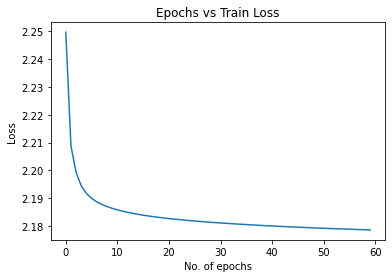

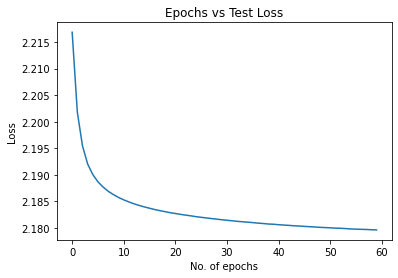

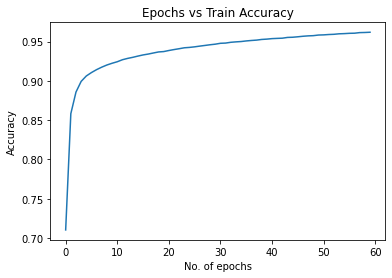

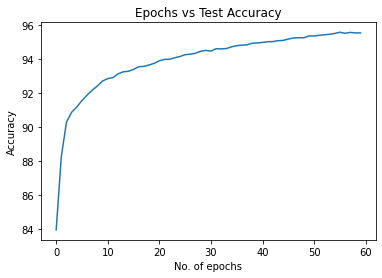

accuracy is 95.57
Training and evaluation finished


In [ ]:
FLAGS = Namespace(batch_size=10, learning_rate=0.1, log_dir='logs', mode=1, num_epochs=60)
run_main(FLAGS)

Torch device selected:  cuda
Using model # 2
Current epoch:  1


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train set: Average loss: 2.3019, Accuracy: 6672/60000 (11%)


Test set: Average loss: 2.3016, Accuracy: 1135/10000 (11%)

Current epoch:  2
Train set: Average loss: 2.3015, Accuracy: 6742/60000 (11%)


Test set: Average loss: 2.3014, Accuracy: 1135/10000 (11%)

Current epoch:  3
Train set: Average loss: 2.3015, Accuracy: 6742/60000 (11%)


Test set: Average loss: 2.3014, Accuracy: 1135/10000 (11%)

Current epoch:  4
Train set: Average loss: 2.3014, Accuracy: 6742/60000 (11%)


Test set: Average loss: 2.3012, Accuracy: 1135/10000 (11%)

Current epoch:  5
Train set: Average loss: 2.3012, Accuracy: 6742/60000 (11%)


Test set: Average loss: 2.3009, Accuracy: 1135/10000 (11%)

Current epoch:  6
Train set: Average loss: 2.3005, Accuracy: 6742/60000 (11%)


Test set: Average loss: 2.2994, Accuracy: 1135/10000 (11%)

Current epoch:  7
Train set: Average loss: 2.2927, Accuracy: 10192/60000 (17%)


Test set: Average loss: 2.2754, Accuracy: 5690/10000 (57%)

Current epoch:  8
Train set: Average 

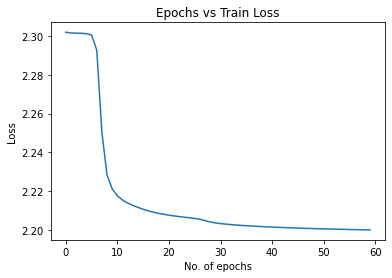

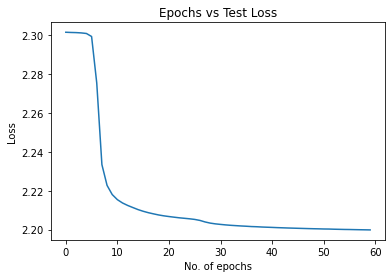

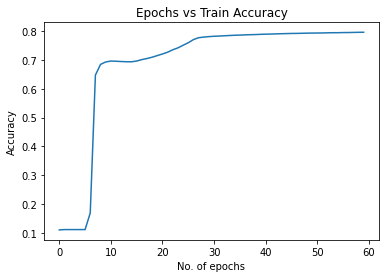

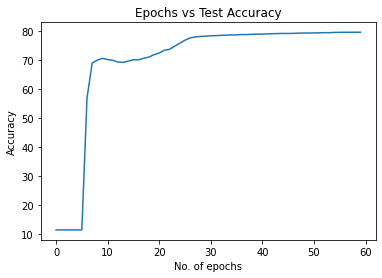

accuracy is 79.66
Training and evaluation finished


In [ ]:
FLAGS = Namespace(batch_size=10, learning_rate=0.1, log_dir='logs', mode=2, num_epochs=60)
run_main(FLAGS)

Torch device selected:  cuda
Using model # 3
Current epoch:  1


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train set: Average loss: 1.6340, Accuracy: 50199/60000 (84%)


Test set: Average loss: 1.4963, Accuracy: 9673/10000 (97%)

Current epoch:  2
Train set: Average loss: 1.4895, Accuracy: 58389/60000 (97%)


Test set: Average loss: 1.4802, Accuracy: 9816/10000 (98%)

Current epoch:  3
Train set: Average loss: 1.4815, Accuracy: 58823/60000 (98%)


Test set: Average loss: 1.4793, Accuracy: 9820/10000 (98%)

Current epoch:  4
Train set: Average loss: 1.4781, Accuracy: 59032/60000 (98%)


Test set: Average loss: 1.4747, Accuracy: 9867/10000 (99%)

Current epoch:  5
Train set: Average loss: 1.4750, Accuracy: 59199/60000 (99%)


Test set: Average loss: 1.4756, Accuracy: 9858/10000 (99%)

Current epoch:  6
Train set: Average loss: 1.4736, Accuracy: 59278/60000 (99%)


Test set: Average loss: 1.4780, Accuracy: 9832/10000 (98%)

Current epoch:  7
Train set: Average loss: 1.4723, Accuracy: 59353/60000 (99%)


Test set: Average loss: 1.4733, Accuracy: 9886/10000 (99%)

Current epoch:  8
Train set: Av

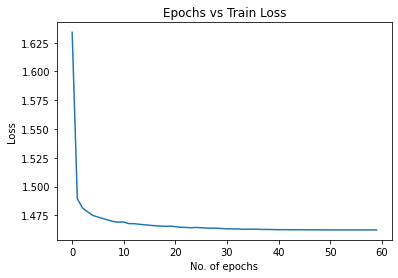

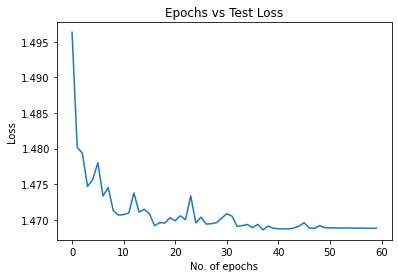

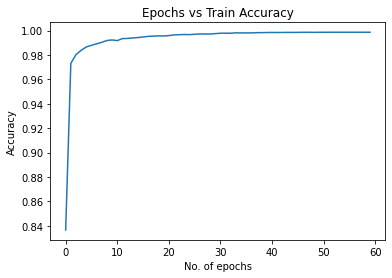

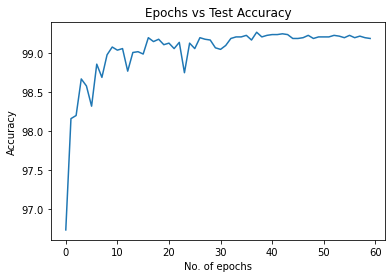

accuracy is 99.27
Training and evaluation finished


In [ ]:
FLAGS = Namespace(batch_size=10, learning_rate=0.03, log_dir='logs', mode=3, num_epochs=60)
run_main(FLAGS)

Torch device selected:  cuda
Using model # 4
Current epoch:  1


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train set: Average loss: 1.8089, Accuracy: 39749/60000 (66%)


Test set: Average loss: 1.5927, Accuracy: 8689/10000 (87%)

Current epoch:  2
Train set: Average loss: 1.5873, Accuracy: 52430/60000 (87%)


Test set: Average loss: 1.5769, Accuracy: 8837/10000 (88%)

Current epoch:  3
Train set: Average loss: 1.5767, Accuracy: 52978/60000 (88%)


Test set: Average loss: 1.5741, Accuracy: 8851/10000 (89%)

Current epoch:  4
Train set: Average loss: 1.5721, Accuracy: 53192/60000 (89%)


Test set: Average loss: 1.5709, Accuracy: 8870/10000 (89%)

Current epoch:  5
Train set: Average loss: 1.5245, Accuracy: 56155/60000 (94%)


Test set: Average loss: 1.4800, Accuracy: 9815/10000 (98%)

Current epoch:  6
Train set: Average loss: 1.4805, Accuracy: 58871/60000 (98%)


Test set: Average loss: 1.4819, Accuracy: 9795/10000 (98%)

Current epoch:  7
Train set: Average loss: 1.4776, Accuracy: 59038/60000 (98%)


Test set: Average loss: 1.4805, Accuracy: 9807/10000 (98%)

Current epoch:  8
Train set: Av

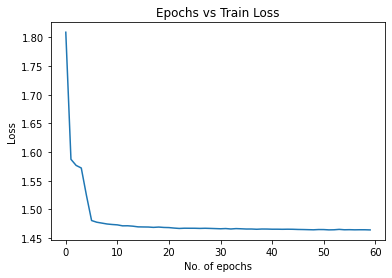

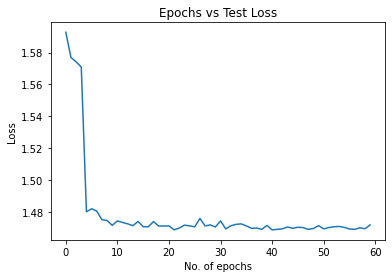

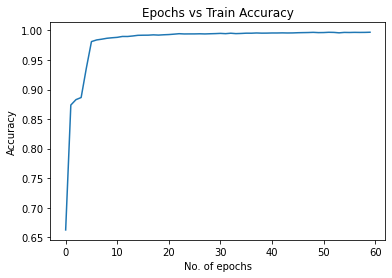

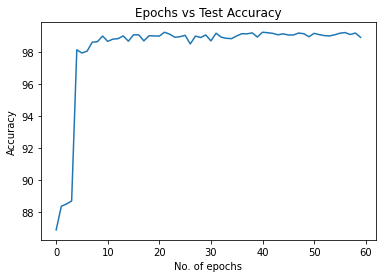

accuracy is 99.25
Training and evaluation finished


In [ ]:
FLAGS = Namespace(batch_size=10, learning_rate=0.03, log_dir='logs', mode=4, num_epochs=60)
run_main(FLAGS)

Torch device selected:  cuda
Using model # 5


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Current epoch:  1


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

Train set: Average loss: 1.7748, Accuracy: 41290/60000 (69%)


Test set: Average loss: 1.5909, Accuracy: 8698/10000 (87%)

Current epoch:  2
Train set: Average loss: 1.5732, Accuracy: 53290/60000 (89%)


Test set: Average loss: 1.4872, Accuracy: 9751/10000 (98%)

Current epoch:  3
Train set: Average loss: 1.4942, Accuracy: 58075/60000 (97%)


Test set: Average loss: 1.4841, Accuracy: 9772/10000 (98%)

Current epoch:  4
Train set: Average loss: 1.4881, Accuracy: 58413/60000 (97%)


Test set: Average loss: 1.4795, Accuracy: 9820/10000 (98%)

Current epoch:  5
Train set: Average loss: 1.4845, Accuracy: 58609/60000 (98%)


Test set: Average loss: 1.4755, Accuracy: 9856/10000 (99%)

Current epoch:  6
Train set: Average loss: 1.4806, Accuracy: 58848/60000 (98%)


Test set: Average loss: 1.4779, Accuracy: 9836/10000 (98%)

Current epoch:  7
Train set: Average loss: 1.4789, Accuracy: 58946/60000 (98%)


Test set: Average loss: 1.4734, Accuracy: 9882/10000 (99%)

Current epoch:  8
Train set: Av

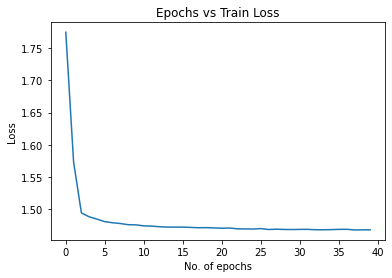

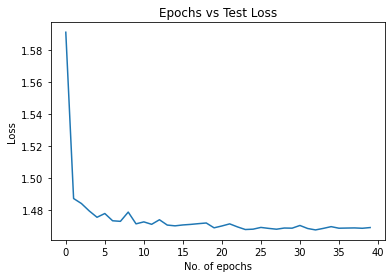

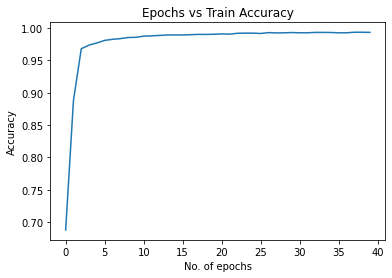

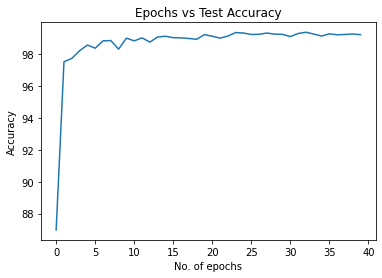

accuracy is 99.36
Training and evaluation finished


In [ ]:
FLAGS = Namespace(batch_size=10, learning_rate=0.03, log_dir='logs', mode=5, num_epochs=40)
run_main(FLAGS)

In [ ]:
%debug